In [2]:
# Importing Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

# Initializing the CNN
classifier = Sequential()

# Convolution Step 1
classifier.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(224, 224, 3), activation = 'relu'))

# Max Pooling Step 1
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
classifier.add(BatchNormalization())

# Convolution Step 2
classifier.add(Convolution2D(256, 11, strides = (1, 1), padding='valid', activation = 'relu'))

# Max Pooling Step 2
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding='valid'))
classifier.add(BatchNormalization())

# Convolution Step 3
classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
classifier.add(BatchNormalization())

# Convolution Step 4
classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
classifier.add(BatchNormalization())

# Convolution Step 5
classifier.add(Convolution2D(256, 3, strides=(1,1), padding='valid', activation = 'relu'))

# Max Pooling Step 3
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
classifier.add(BatchNormalization())

# Flattening Step
classifier.add(Flatten())

# Full Connection Step
classifier.add(Dense(units = 4096, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 4096, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 1000, activation = 'relu'))
classifier.add(Dropout(0.2))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 38, activation = 'softmax'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 384)         8

In [3]:
classifier.load_weights('D:/IIITNinternship/PlantLeafDiseaseDetection/best_weights_9.hdf5')

In [4]:
#Freeze Layers
from keras import layers
for i, layer in enumerate(classifier.layers):
   print(i, layer.name)

0 conv2d
1 max_pooling2d
2 batch_normalization
3 conv2d_1
4 max_pooling2d_1
5 batch_normalization_1
6 conv2d_2
7 batch_normalization_2
8 conv2d_3
9 batch_normalization_3
10 conv2d_4
11 max_pooling2d_2
12 batch_normalization_4
13 flatten
14 dense
15 dropout
16 batch_normalization_5
17 dense_1
18 dropout_1
19 batch_normalization_6
20 dense_2
21 dropout_2
22 batch_normalization_7
23 dense_3


In [5]:
# we chose to train the top 2 conv blocks, i.e. we will freeze
# the first 8 layers and unfreeze the rest:
print("Freezed layers:")
for i, layer in enumerate(classifier.layers[:20]):
    print(i, layer.name)
    layer.trainable = False

Freezed layers:
0 conv2d
1 max_pooling2d
2 batch_normalization
3 conv2d_1
4 max_pooling2d_1
5 batch_normalization_1
6 conv2d_2
7 batch_normalization_2
8 conv2d_3
9 batch_normalization_3
10 conv2d_4
11 max_pooling2d_2
12 batch_normalization_4
13 flatten
14 dense
15 dropout
16 batch_normalization_5
17 dense_1
18 dropout_1
19 batch_normalization_6


In [6]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 384)         8

In [7]:
from keras import optimizers
classifier.compile(optimizer=optimizers.SGD(lr=0.001, momentum=0.9, decay=0.005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
from keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')



batch_size = 128
base_dir = "D:/IIITNinternship/PlantDataset"

test_set = test_datagen.flow_from_directory(base_dir+'/test',
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

Found 8813 images belonging to 38 classes.


In [9]:
class_dict = test_set.class_indices
print(class_dict)
test_num = test_set.samples

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [10]:
from keras.callbacks import ModelCheckpoint
weightpath = "best_weights_9.hdf5"
checkpoint = ModelCheckpoint(weightpath, monitor='test_acc', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
callbacks_list = [checkpoint]

#fitting images to CNN
history = classifier.fit(test_set,
                         steps_per_epoch=test_num//batch_size,
                         epochs=25,
                         callbacks=callbacks_list)
#saving model
filepath="AlexNetModel.hdf5"
classifier.save(filepath)

Epoch 1/25
68/68 [==============================] - 191s 3s/step - loss: 0.1436 - accuracy: 0.9547
Epoch 2/25
68/68 [==============================] - 156s 2s/step - loss: 0.1316 - accuracy: 0.9529
Epoch 3/25
68/68 [==============================] - 169s 2s/step - loss: 0.1253 - accuracy: 0.9596
Epoch 4/25
68/68 [==============================] - 155s 2s/step - loss: 0.1338 - accuracy: 0.9558
Epoch 5/25
68/68 [==============================] - 162s 2s/step - loss: 0.1261 - accuracy: 0.9587
Epoch 6/25
68/68 [==============================] - 243s 4s/step - loss: 0.1250 - accuracy: 0.9589
Epoch 7/25
68/68 [==============================] - 180s 3s/step - loss: 0.1275 - accuracy: 0.9577
Epoch 8/25
68/68 [==============================] - 168s 2s/step - loss: 0.1230 - accuracy: 0.9592
Epoch 9/25
68/68 [==============================] - 158s 2s/step - loss: 0.1266 - accuracy: 0.9580
Epoch 10/25
68/68 [==============================] - 310s 5s/step - loss: 0.1312 - accuracy: 0.9554
Epoch 11/

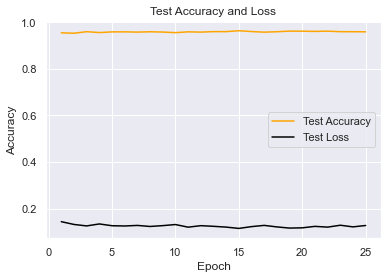

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='orange', label='Test Accuracy')
plt.plot(epochs, loss, color='black', label='Test Loss')
plt.title('Test Accuracy and Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()

plt.show()